In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn import svm
from sklearn import metrics

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform as sp_rand
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

from sklearn.utils import resample
from sklearn.utils import shuffle


from xgboost import XGBClassifier
import shap

from sklearn.metrics import accuracy_score
from matplotlib import pyplot

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

## Train Model

In [3]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/iEdit/Database/ml-training-dataset-v1.csv')
X_train = train.iloc[:, 1:9601]
Y_train = train.iloc[:, 9601]

# model = MLPClassifier(solver='lbfgs', alpha=0.1, activation='tanh', learning_rate = 'constant') # Artificial Neural Network

# model = RandomForestClassifier() # Random Forest

model = XGBClassifier(
#                       use_label_encoder=False, # XGBoost
                      scale_pos_weight=1, # set accourding to the ratio of the class
#                       learning_rate=0.01,
#                       colsample_bytree = 0.4,
#                       subsample = 0.8,
#                       objective='binary:logistic',
#                       n_estimators=30,
#                       reg_alpha = 0.3,
#                       max_depth=6,
#                       gamma=5,
                      eval_metric='mlogloss'
                      )

# model = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42,splitter='best') # Decision Tree

model = model.fit(X_train, Y_train)

print('Model train completed')

Model train completed


## Testing Accuracy

In [6]:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/iEdit/Database/ml-test-dataset-v1.csv')
#train = pd.read_csv('dataset/soeditsTraining_v2.csv')
X_test = test.iloc[:, 1:9601]
Y_test = test.iloc[:, 9601]

yPredict = model.predict(X_test)

#print(yPredict)

# Save Y_test and yPredict into a CSV
results = pd.DataFrame({
    "Y_test": Y_test,
    "yPredict": yPredict
})
results.to_csv("/content/drive/My Drive/Colab Notebooks/iEdit/Database/ytest-ypredict-xgboost.csv", index=False)

target_names = ['consistent','inconsistent']

print(classification_report(Y_test, yPredict, target_names = target_names , digits=4))

print('Accuracy is : ')
print( accuracy_score(Y_test, yPredict))

              precision    recall  f1-score   support

  consistent     0.9190    0.9797    0.9484       197
inconsistent     0.9789    0.9163    0.9466       203

    accuracy                         0.9475       400
   macro avg     0.9490    0.9480    0.9475       400
weighted avg     0.9494    0.9475    0.9475       400

Accuracy is : 
0.9475


## XGBoost for all the inconsistency types

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where

In [ ]:
train = pd.read_csv('Database/ml-training-dataset-v1.csv')
X_train = train.iloc[:, 1:9601]
Y_train = train.iloc[:, 9609]

# sm = SMOTE(random_state=42)
# X_train, Y_train = sm.fit_resample(X_train, Y_train)

model = XGBClassifier(use_label_encoder=False, # XGBoost
                      scale_pos_weight=76.4, # set accourding to the ratio of the class
#                       learning_rate=0.01,
#                       colsample_bytree = 0.4,
#                       subsample = 0.8,
#                       objective='binary:logistic',
#                       n_estimators=30,
#                       reg_alpha = 0.3,
#                       max_depth=6,
#                       gamma=5,
                      eval_metric='mlogloss')

model = model.fit(X_train, Y_train)

print('Model train completed')

test = pd.read_csv('Database/ml-test-dataset-v1.csv')
#train = pd.read_csv('dataset/soeditsTraining_v2.csv')
X_test = test.iloc[:, 1:9601]
Y_test = test.iloc[:, 9609]

# sm = SMOTE(random_state=42)
# X_test, Y_test = sm.fit_resample(X_test, Y_test)

undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_test, Y_test = undersample.fit_resample(X_test, Y_test)

counter = Counter(Y_test)
print(counter)

yPredict = model.predict(X_test)

#print(yPredict)

target_names = ['consistent','inconsistent']

print(classification_report(Y_test, yPredict, target_names = target_names , digits=4))

print('Accuracy is : ')
print( accuracy_score(Y_test, yPredict))

Model train completed
Counter({0: 16, 1: 16})
              precision    recall  f1-score   support

  consistent     0.8421    1.0000    0.9143        16
inconsistent     1.0000    0.8125    0.8966        16

    accuracy                         0.9062        32
   macro avg     0.9211    0.9062    0.9054        32
weighted avg     0.9211    0.9062    0.9054        32

Accuracy is : 
0.90625


## For learning purpose

### https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Multiple documents
text = ["It was the best of times", "it was the worst of times", "it was the age of wisdom", "it was the age of foolishness"]
# create the transform
vectorizer = CountVectorizer(max_features=10)
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(sorted(vectorizer.vocabulary_))

['age', 'best', 'foolishness', 'it', 'of', 'the', 'times', 'was', 'wisdom', 'worst']


In [ ]:
vector = vectorizer.fit_transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(4, 10)
[[0 1 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 1]
 [1 0 0 1 1 1 0 1 1 0]
 [1 0 1 1 1 1 0 1 0 0]]


In [ ]:
text2 = ["the the the times Bag-of-Words Model for Beginners"]
vector = vectorizer.transform(text2)
print(sorted(vectorizer.vocabulary_))
print(vector.toarray())

['age', 'best', 'foolishness', 'it', 'of', 'the', 'times', 'was', 'wisdom', 'worst']
[[0 0 0 0 1 3 1 0 0 0]]


Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


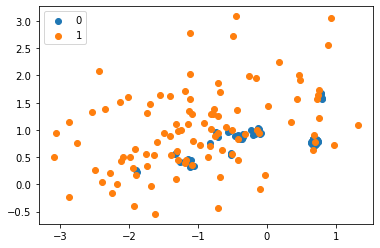

In [ ]:
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()